In [63]:
import pandas as pd

In [64]:
df = pd.read_csv('../data/Seaborn/cost_revenue_dirty.csv')

In [65]:
df.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [66]:
df.any().isnull()

Rank                     False
Release_Date             False
Movie_Title              False
USD_Production_Budget    False
USD_Worldwide_Gross      False
USD_Domestic_Gross       False
dtype: bool

In [67]:
df.duplicated().any()

False

In [68]:
df.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

In [61]:
cols = ['USD_Production_Budget','USD_Worldwide_Gross','USD_Domestic_Gross']

df[cols] = df[cols].astype(int)

KeyError: "None of [Index(['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross'], dtype='object')] are in the [index]"

need to sove for commas and $

In [69]:
# for loops to replce the specific characters and then do it for all three columns

cols = ['USD_Production_Budget','USD_Worldwide_Gross','USD_Domestic_Gross']
chars = ['$',',']

#df[cols] = df[cols].astype(str).str.replace(',',"",regex=True)

for col in cols:
    for char in chars:
        df[col] = df[col].astype(str).str.replace(char,"")
    df[col] = pd.to_numeric(df[col])

In [70]:
df.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


In [71]:
df.Release_Date = pd.to_datetime(df.Release_Date)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


In [73]:
df.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [74]:
df.mean(axis=0)

Rank                     2.696000e+03
USD_Production_Budget    3.111374e+07
USD_Worldwide_Gross      8.885542e+07
USD_Domestic_Gross       4.123552e+07
dtype: float64

In [75]:
df.min()

Rank                                       1
Release_Date             1915-08-02 00:00:00
Movie_Title                          #Horror
USD_Production_Budget                   1100
USD_Worldwide_Gross                        0
USD_Domestic_Gross                         0
dtype: object

In [76]:
df.quantile(0.25)

Rank                        1348.5
USD_Production_Budget    5000000.0
USD_Worldwide_Gross      3865206.0
USD_Domestic_Gross       1330901.5
Name: 0.25, dtype: float64

In [77]:
df.sort_values('USD_Production_Budget',ascending = False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225
2911,3,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,963420425,309420425
4925,4,2015-06-11,Spectre,300000000,879620923,200074175
4333,6,2013-02-07,The Lone Ranger,275000000,260002115,89302115
...,...,...,...,...,...,...
1209,5387,1999-02-04,Following,6000,240495,48482
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0
2462,5388,2005-07-13,Return to the Land of Wonders,5000,1338,1338
5007,5390,2015-09-29,A Plague So Pleasant,1400,0,0


In [82]:
zeros = df[df['USD_Domestic_Gross'] == 0]

In [83]:
zeros.shape

(512, 6)

In [84]:
zeros.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0


In [85]:
zeros_worldwide = df[df['USD_Worldwide_Gross'] == 0]

In [86]:
zeros_worldwide.sort_values('USD_Production_Budget',ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [87]:
filters = df.loc[(df['USD_Worldwide_Gross'] != 0)& (df['USD_Domestic_Gross'] == 0)]

In [89]:
filters.head()
filters.shape

(155, 6)

another way to use mulitple filters is with query

In [94]:
international_releases = df.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')

In [104]:
not_released = df[df['Release_Date'] >= pd.Timestamp('2018-05-01')]

In [105]:
not_released.shape

(7, 6)

In [103]:
not_released.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [106]:
df_clean = df[df['Release_Date'] <= pd.Timestamp('2018-05-01')]

In [107]:
df_clean.shape

(5384, 6)

In [108]:
df_clean.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5384.000000,5.384000e+03,5.384000e+03,5.384000e+03
mean,2698.113113,3.103848e+07,8.897095e+07,4.128913e+07
std,1555.789968,4.044004e+07,1.685368e+08,6.605551e+07
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,1351.750000,5.000000e+06,3.929036e+06,1.354765e+06
50%,2698.500000,1.700000e+07,2.753733e+07,1.722193e+07
75%,4045.250000,4.000000e+07,9.664200e+07,5.240353e+07
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08


In [111]:
shitty = df_clean[df_clean['USD_Worldwide_Gross'] < df_clean['USD_Production_Budget']]

In [112]:
shitty.shape

(2007, 6)

In [118]:
x = 100* len(shitty) / len(df_clean)

In [119]:
print(f'{x}% of movies lost money! That is a losing business')

37.27711738484398% of movies lost money! That is a losing business


In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

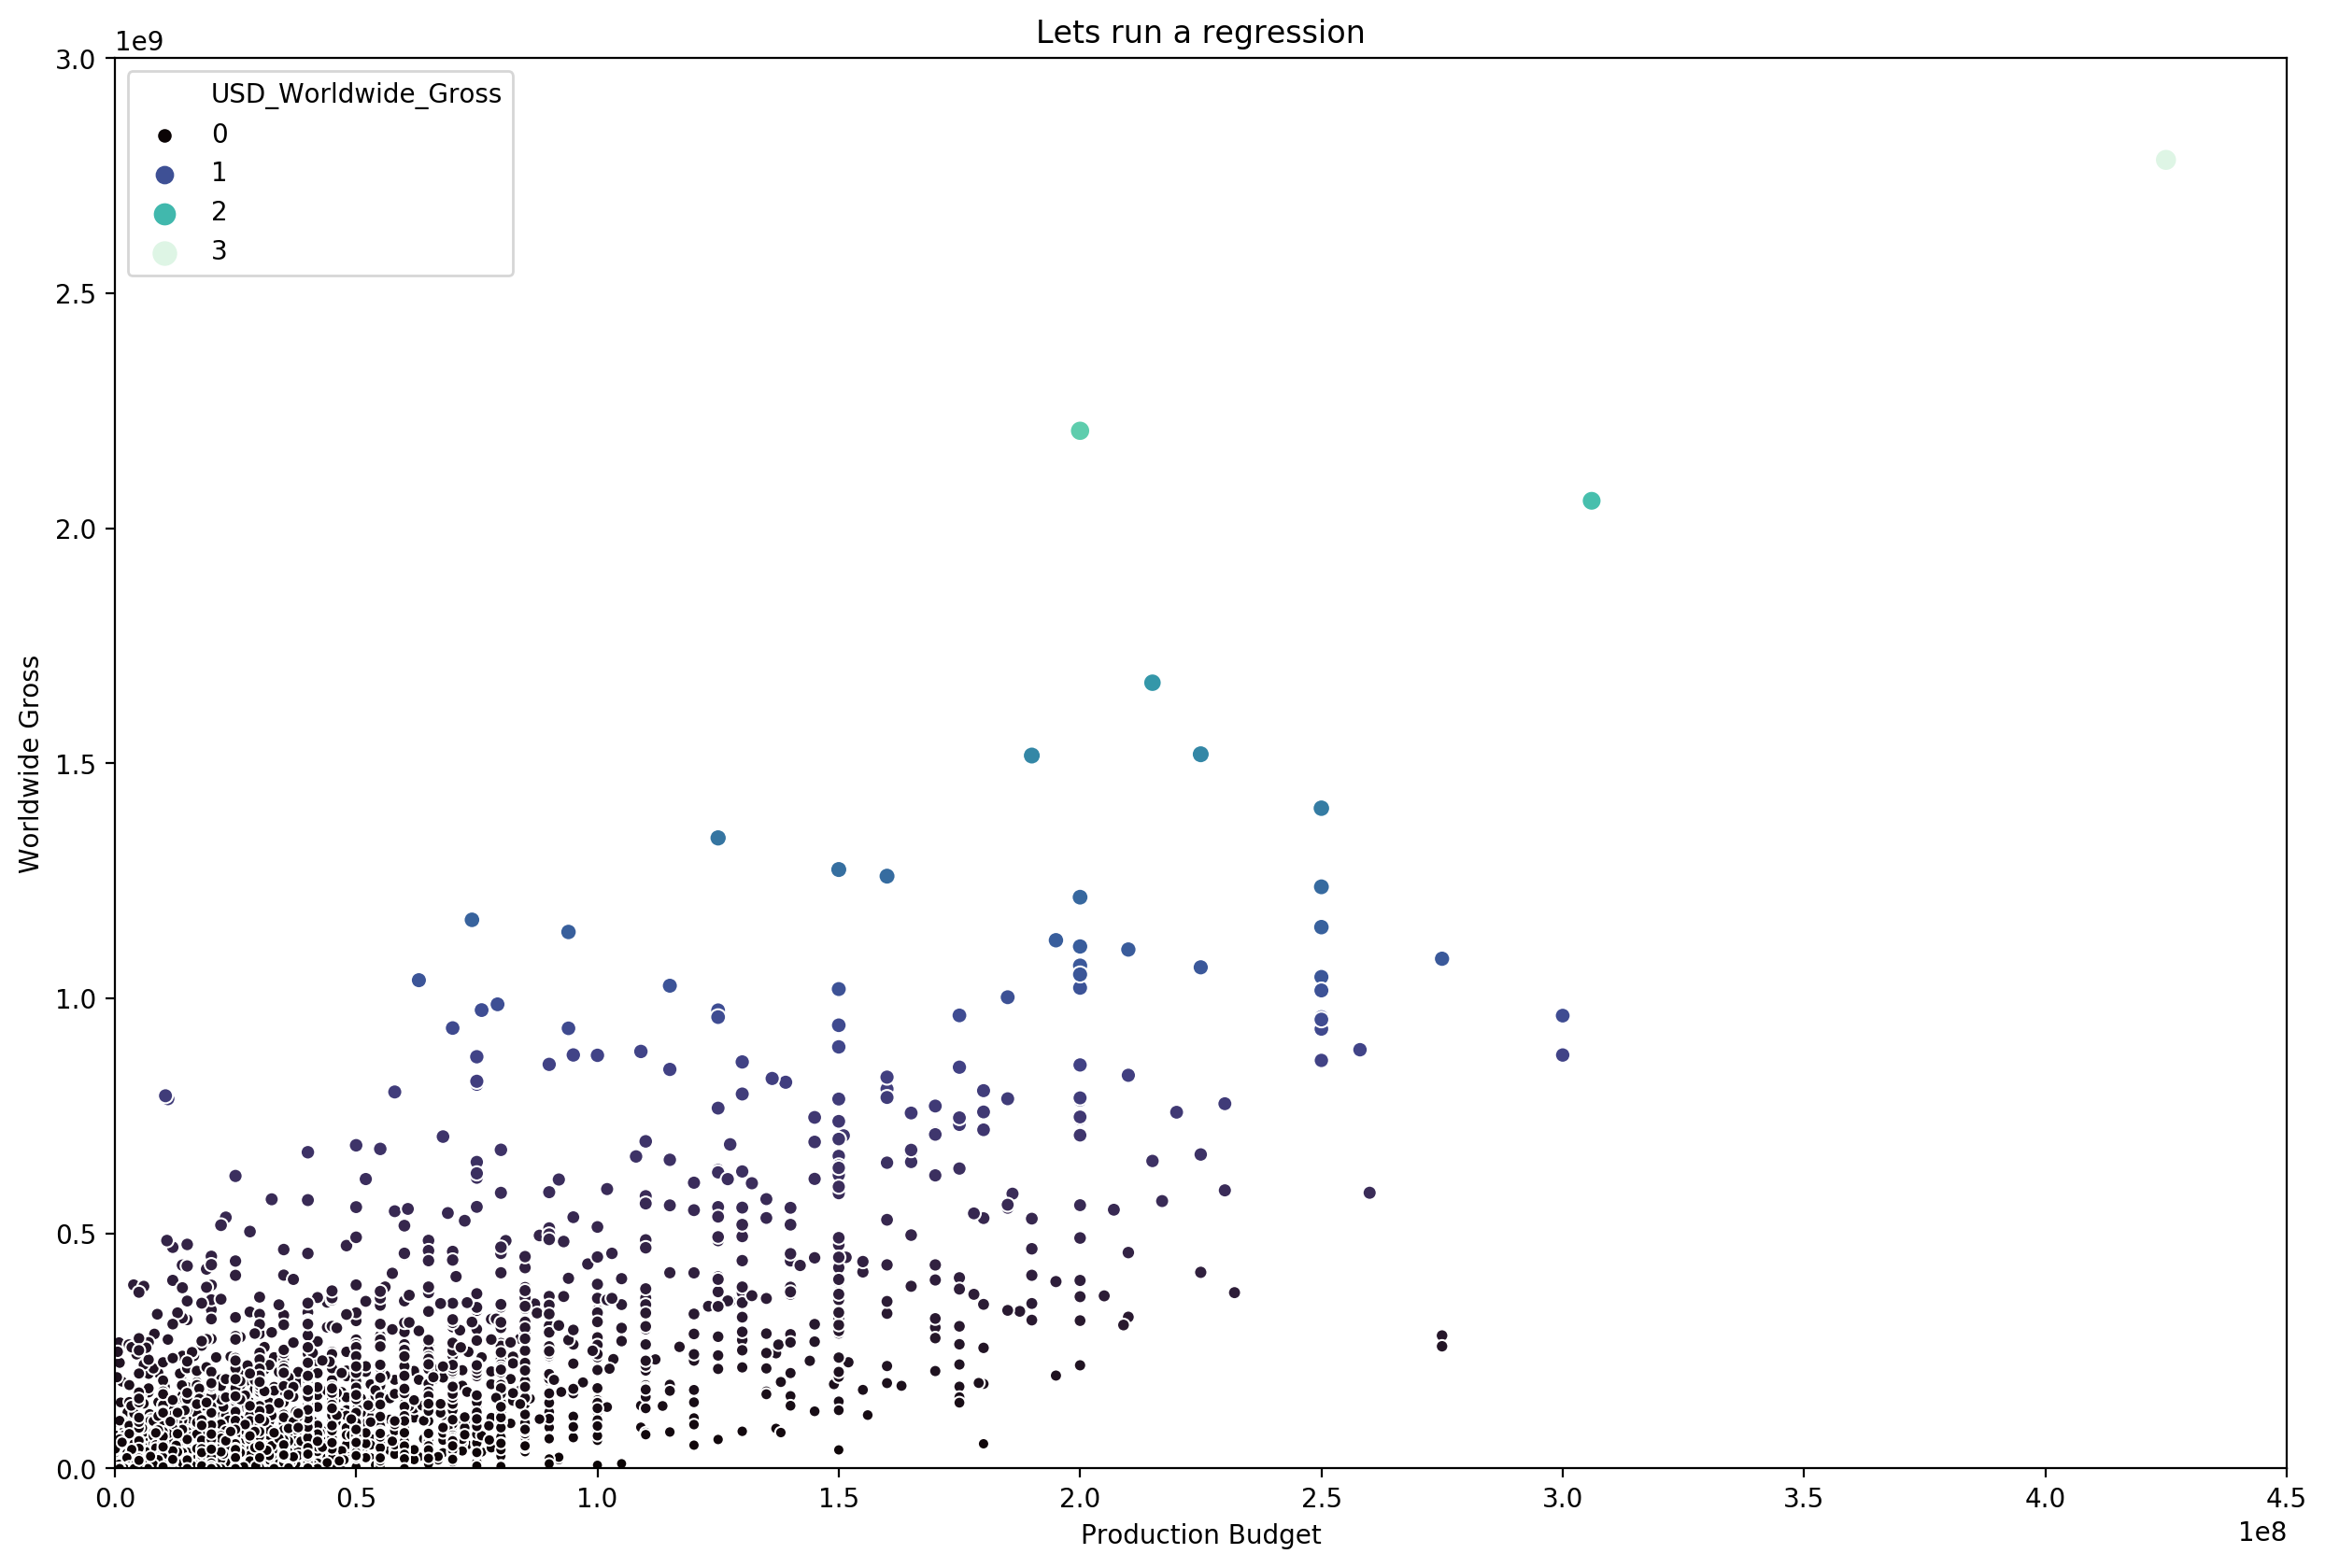

In [144]:
plt.figure(figsize=(15,10),dpi=200)

ax = sns.scatterplot(data=df_clean,y='USD_Worldwide_Gross',x='USD_Production_Budget',size='USD_Worldwide_Gross',hue='USD_Worldwide_Gross',palette='mako')

ax.set(ylim=(0,3000000000)
      ,xlim=(0,450000000)
      ,title='Lets run a regression'
       ,xlabel='Production Budget'
       ,ylabel='Worldwide Gross'
      )

plt.show(ax)

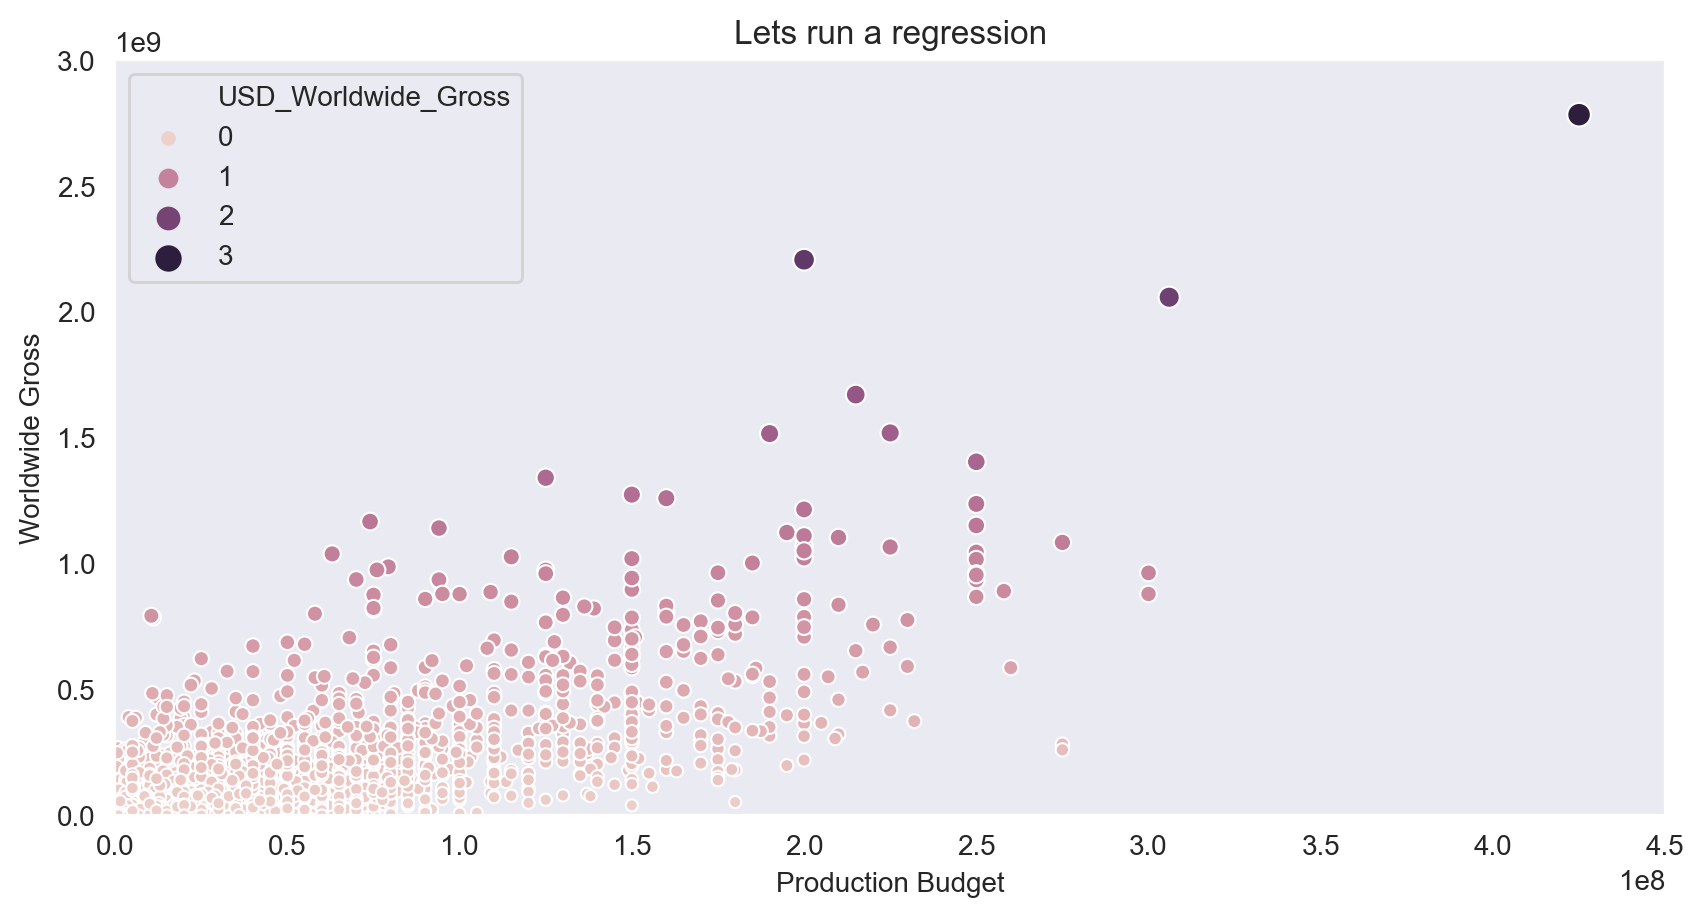

In [148]:
plt.figure(figsize=(10,5),dpi=200)

with sns.axes_style('dark'):
    

    ax = sns.scatterplot(data=df_clean,y='USD_Worldwide_Gross',x='USD_Production_Budget',size='USD_Worldwide_Gross',hue='USD_Worldwide_Gross')

    ax.set(ylim=(0,3000000000)
          ,xlim=(0,450000000)
          ,title='Lets run a regression'
           ,xlabel='Production Budget'
           ,ylabel='Worldwide Gross'
          )

    plt.show(ax)

In [149]:
df_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


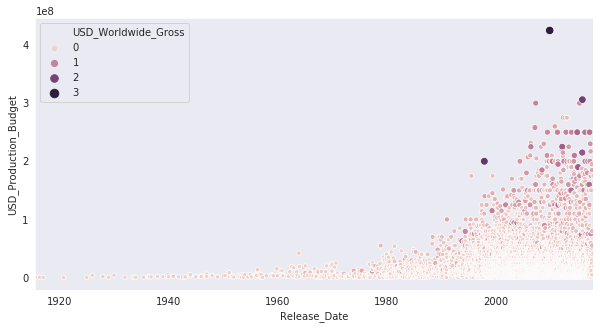

In [158]:
plt.figure(figsize=(10,5))

with sns.axes_style('dark'):
    ax = sns.scatterplot(data=df_clean,x='Release_Date',y='USD_Production_Budget',size='USD_Worldwide_Gross',hue='USD_Worldwide_Gross')
    ax.set(
        xlim=(df_clean.Release_Date.min(),df_clean.Release_Date.max())
    )
plt.show()

In [177]:
#df_clean['year'] = df_clean['Release_Date'].dt.year
years = pd.DatetimeIndex(df_clean['Release_Date']).year


In [179]:
# getting decade from year
decades = years // 10 * 10

In [180]:
df_clean['Decade'] = decades

/Users/jacobwong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [184]:
#df_clean.insert(loc=1,column='Decade',value=decades)

ValueError: cannot insert Decade, already exists

In [185]:
df_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,year,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1915,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1916,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1916,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1925,1920


In [186]:
old = df_clean[df_clean.Decade <=1960]
old.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,year,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1915,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1916,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1916,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1925,1920


In [187]:
new = df_clean[df_clean.Decade >1960]
new.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,year,Decade
153,2159,1970-01-01,Waterloo,25000000,0,0,1970,1970
154,2270,1970-01-01,Darling Lili,22000000,5000000,5000000,1970,1970
155,3136,1970-01-01,Patton,12000000,62500000,62500000,1970,1970
156,3277,1970-01-01,The Molly Maguires,11000000,2200000,2200000,1970,1970
157,4265,1970-01-01,M*A*S*H,3500000,81600000,81600000,1970,1970


In [189]:
old.count()
new.count()

Rank                     5231
Release_Date             5231
Movie_Title              5231
USD_Production_Budget    5231
USD_Worldwide_Gross      5231
USD_Domestic_Gross       5231
year                     5231
Decade                   5231
dtype: int64

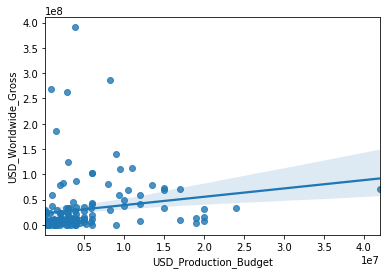

In [195]:
# regplot is an easy way to map regression line over a scatterplot. in this case not a lot of correlation
sns.regplot(data=old,x='USD_Production_Budget',y='USD_Worldwide_Gross')

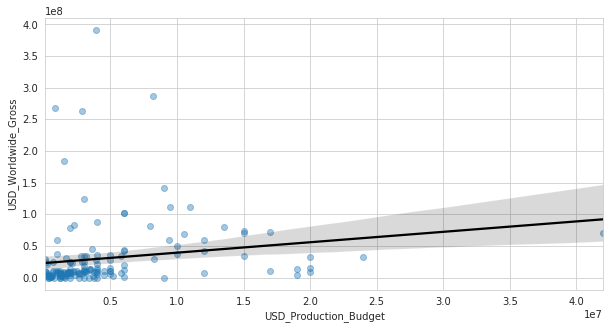

In [196]:
plt.figure(figsize=(10,5))

with sns.axes_style("whitegrid"):
  sns.regplot(data=old,x='USD_Production_Budget',y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4}, # opacity of dots
            line_kws = {'color': 'black'}) # regression line color

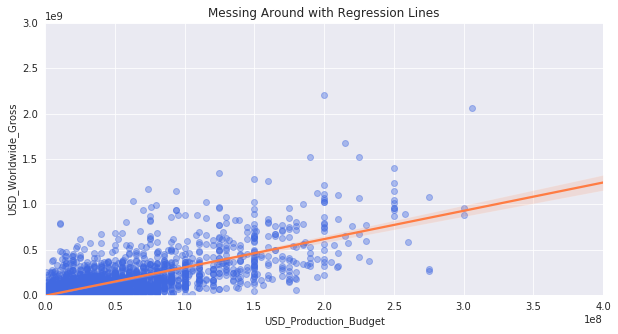

In [210]:
plt.figure(figsize=(10,5))

with sns.axes_style("darkgrid"):
  ax = sns.regplot(data=new,x='USD_Production_Budget',y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4,'color':'royalblue'}, # opacity of dots
            line_kws = {'color': '#ff7c43'}
            ) # regression line color
  ax.set(xlim =(0,400000000),
         ylim=(0,3000000000),
         
        title ='Messing Around with Regression Lines')

#### new movies have a better fit than old, but still not *great*
#### next up is finding the exact regression line with scikit learn

In [211]:
from sklearn.linear_model import LinearRegression

In [212]:
regression = LinearRegression()

In [214]:
x = pd.DataFrame(data=new,columns=['USD_Production_Budget'])
y = pd.DataFrame(data=new,columns=['USD_Worldwide_Gross'])

In [215]:
regression.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [216]:
regression.score(x,y)

0.5577032617720403

In [217]:
print(f'a regression score of {regression.score(x,y)} is an okay but not great fit for the data')

a regression score of 0.5577032617720403 is an okay but not great fit for the data


In [218]:
# do the same for the old dataframe

In [219]:
# 1. create the Regression Object
oldregression = LinearRegression()

In [220]:
# 2. create the variables for the object to interact with
x2 = pd.DataFrame(data=old,columns=['USD_Production_Budget'])
y2 = pd.DataFrame(data=old,columns=['USD_Worldwide_Gross'])

In [221]:
oldregression.fit(x2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [222]:
oldregression.score(x2,y2)

0.02937258620576877

In [223]:
print(f'a score of {oldregression.score(x2,y2)} is frankly a garbage fit which we already knew from the graph')

a score of 0.02937258620576877 is frankly a garbage fit which we already knew from the graph
